<a href="https://colab.research.google.com/github/254-KIPSANG/EDA--PYTHON/blob/main/project_proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
#mount dataframe to drive

breast_df = pd.read_csv('/content/drive/MyDrive/PROPOSALS/Breast_GSE45827.csv')

# Print the head of the DataFrame
print(breast_df.head())


   samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0       84  basal   9.850040  8.097927  6.424728  7.353027   3.029122   
1       85  basal   9.861357  8.212222  7.062593  7.685578   3.149468   
2       87  basal  10.103478  8.936137  5.735970  7.687822   3.125931   
3       90  basal   9.756875  7.357148  6.479183  6.986624   3.181638   
4       91  basal   9.408330  7.746404  6.693980  7.333426   3.169923   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.880079  4.963740  4.408328  ...             12.229711   
1  7.542283  5.129607  4.584418  ...             12.178531   
2  6.562369  4.813449  4.425195  ...             12.125108   
3  7.802344  5.490982  4.567956  ...             12.111235   
4  7.610457  5.372469  4.424426  ...             12.173642   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             11.852955            13.658701            13.477698   
1             11.809408            13.750086      

In [ ]:

# Get some descriptive statistics
breast_df.describe()

# Check for missing values
breast_df.isnull().sum()

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64

In [ ]:

# Count the number of occurrences of each type in the 'type' column
breast_df['type'].value_counts()



basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64

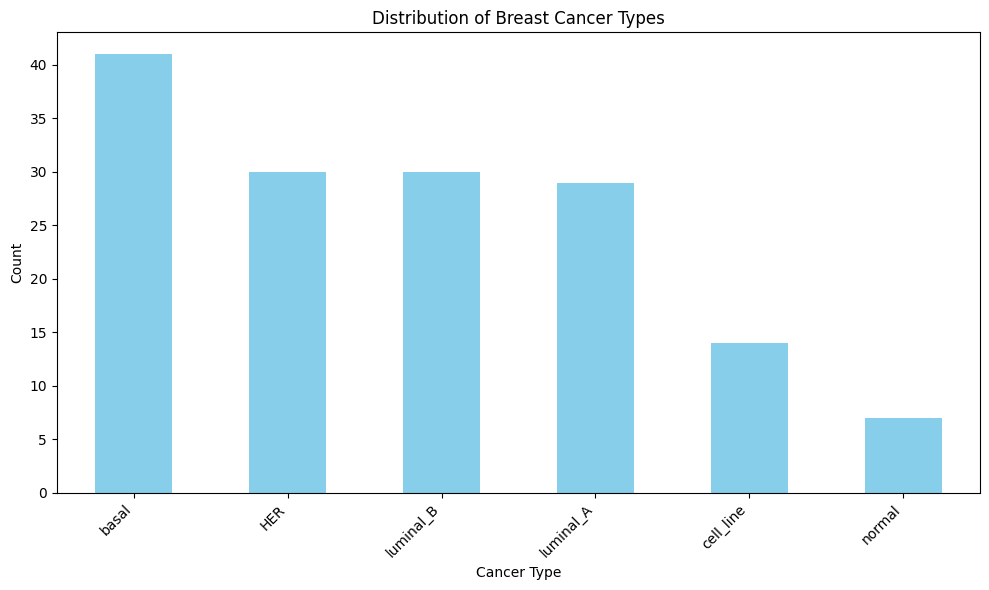

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each type
type_counts = breast_df['type'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Breast Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


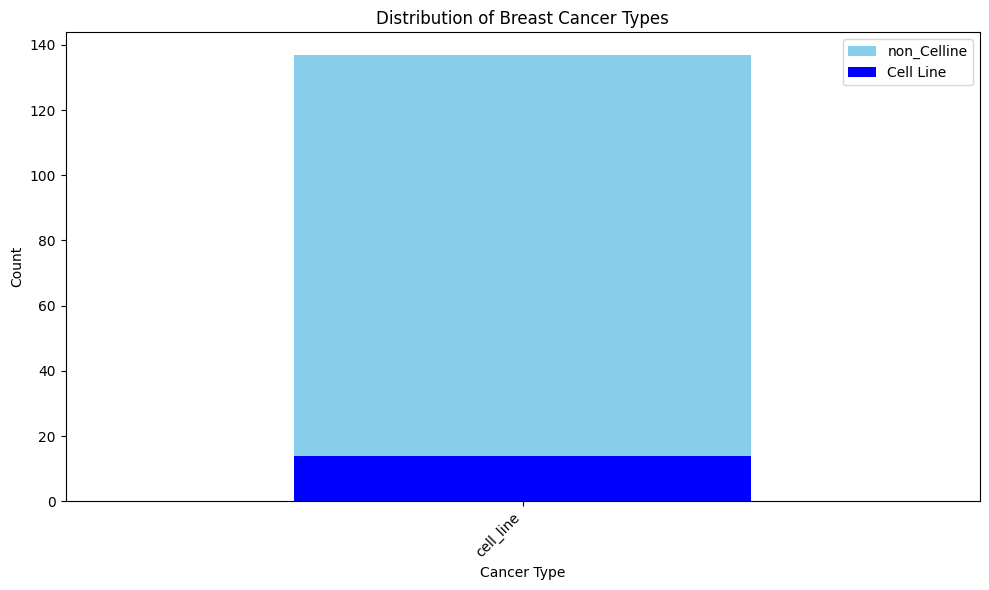

In [ ]:
import matplotlib.pyplot as plt

# Rename non-'cell_line' categories to 'non_Celline'
breast_df.loc[breast_df['type'] != 'cell_line', 'type'] = 'non_Celline'

# Count the occurrences of each type
type_counts = breast_df['type'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))

# Plot all types except 'cell_line' with the same color
type_counts[type_counts.index != 'cell_line'].plot(kind='bar', color='skyblue', label='non_Celline')

# Plot 'cell_line' type with a different color
type_counts[type_counts.index == 'cell_line'].plot(kind='bar', color='blue', label='Cell Line')

plt.title('Distribution of Breast Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Count the number of occurrences of each type in the 'type' column
breast_df['type'].value_counts()



non_Celline    137
cell_line       14
Name: type, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Separate data into training (cell_line) and test (non_Celline) sets
X_train = breast_df.loc[breast_df['Class'] == 'cell_line'].drop('Class', axis=1)
y_train = X_train['Class']
X_train = X_train.drop('Class', axis=1)

X_test = breast_df.loc[breast_df['Class'] == 'non_Celline'].drop('Class', axis=1)
y_test = X_test['Class']
X_test = X_test.drop('Class', axis=1)

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = logistic_model.predict(X_test)

# Evaluate model
print(classification_report(y_test, predictions))


KeyError: 'Class'

In [ ]:
breast_df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,non_Celline,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,non_Celline,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,non_Celline,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,non_Celline,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,non_Celline,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [ ]:
breast_df.info

<bound method DataFrame.info of      samples         type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0         84  non_Celline   9.850040  8.097927  6.424728  7.353027   3.029122   
1         85  non_Celline   9.861357  8.212222  7.062593  7.685578   3.149468   
2         87  non_Celline  10.103478  8.936137  5.735970  7.687822   3.125931   
3         90  non_Celline   9.756875  7.357148  6.479183  6.986624   3.181638   
4         91  non_Celline   9.408330  7.746404  6.693980  7.333426   3.169923   
..       ...          ...        ...       ...       ...       ...        ...   
146      230  non_Celline  10.392638  7.334408  6.848586  7.020486   3.228065   
147      233  non_Celline  10.930875  8.415294  5.906827  7.753572   3.270557   
148      236  non_Celline  11.027098  7.180876  6.304736  7.641197   3.206950   
149      237  non_Celline  10.444395  7.525153  5.964460  7.825939   3.384147   
150      238  non_Celline  11.345817  7.379299  5.891172  7.394586   3.183420

**In this code:**

First train a base Logistic Regression model (logistic_model_base) without any adjustments and evaluate its performance.
Then, we use SMOTE and RUS techniques to handle class imbalance and evaluate the performance of Logistic Regression models trained on the balanced datasets.
Finally, we apply feature selection techniques: L1 regularization, SelectKBest, and RFE to select relevant features and evaluate the performance of Logistic Regression models trained on the selected features.

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, RFE
# from sklearn.preprocessing import StandardScaler
# from imblearn.pipeline import Pipeline
# from sklearn.metrics import classification_report

# # Step 1: Base Model Training
# logistic_model_base = LogisticRegression()
# logistic_model_base.fit(X_train, y_train)
# base_preds = logistic_model_base.predict(X_test)

# # Evaluation of Base Model
# print("Base Model:")
# print(classification_report(y_test, base_preds))

# # Step 2: Handling Class Imbalance with SMOTE and RUS
# # SMOTE
# smote = SMOTE(random_state=42)
# logistic_model_smote = LogisticRegression()
# smote_pipeline = Pipeline([('smote', smote), ('logistic', logistic_model_smote)])
# smote_pipeline.fit(X_train, y_train)
# smote_preds = smote_pipeline.predict(X_test)

# # RUS
# rus = RandomUnderSampler(random_state=42)
# logistic_model_rus = LogisticRegression()
# rus_pipeline = Pipeline([('rus', rus), ('logistic', logistic_model_rus)])
# rus_pipeline.fit(X_train, y_train)
# rus_preds = rus_pipeline.predict(X_test)

# # Evaluation of SMOTE and RUS
# print("SMOTE:")
# print(classification_report(y_test, smote_preds))
# print("RUS:")
# print(classification_report(y_test, rus_preds))

# # Step 3: Feature Selection
# # Embedded Method: L1 Regularization
# logistic_model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
# logistic_model_l1.fit(X_train, y_train)
# l1_selector = SelectFromModel(logistic_model_l1, prefit=True)
# X_train_l1 = l1_selector.transform(X_train)
# X_test_l1 = l1_selector.transform(X_test)
# logistic_model_l1_selected = LogisticRegression()
# logistic_model_l1_selected.fit(X_train_l1, y_train)
# l1_preds = logistic_model_l1_selected.predict(X_test_l1)

# # Filter Method: SelectKBest with ANOVA F-value
# selector = SelectKBest(score_func=f_classif, k=10)
# X_train_filtered = selector.fit_transform(X_train, y_train)
# X_test_filtered = selector.transform(X_test)
# logistic_model_filtered = LogisticRegression()
# logistic_model_filtered.fit(X_train_filtered, y_train)
# filtered_preds = logistic_model_filtered.predict(X_test_filtered)

# # Wrapper Method: Recursive Feature Elimination (RFE)
# rfe = RFE(LogisticRegression(), n_features_to_select=10)
# X_train_rfe = rfe.fit_transform(X_train, y_train)
# X_test_rfe = rfe.transform(X_test)
# logistic_model_rfe = LogisticRegression()
# logistic_model_rfe.fit(X_train_rfe, y_train)
# rfe_preds = logistic_model_rfe.predict(X_test_rfe)

# # Evaluation of Feature Selection Methods
# print("Embedded Method (L1 Regularization):")
# print(classification_report(y_test, l1_preds))
# print("Filter Method (SelectKBest):")
# print(classification_report(y_test, filtered_preds))
# print("Wrapper Method (RFE):")
# print(classification_report(y_test, rfe_preds))


**In this updated code:**

The evaluate_performance function is defined to calculate and print various performance metrics including accuracy, precision, recall, F1-score, and ROC AUC score.
Each step is followed by the evaluation of performance metrics for the base model, SMOTE model, RUS model, and feature selection methods (Embedded Method, Filter Method, Wrapper Method).
Performance metrics are calculated and printed for each model and method to assess their effectiveness in predicting cancer.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Base Model Training
logistic_model_base = LogisticRegression()
logistic_model_base.fit(X_train, y_train)
base_preds = logistic_model_base.predict(X_test)

# Evaluation of Base Model
print("Base Model:")
print(classification_report(y_test, base_preds))




Base Model:
              precision    recall  f1-score   support

   cell_line       1.00      1.00      1.00         5
 non_Celline       1.00      1.00      1.00        26

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [ ]:
# Step 2: Handling Class Imbalance with SMOTE and RUS
# SMOTE
smote = SMOTE(random_state=42)
logistic_model_smote = LogisticRegression()
smote_pipeline = Pipeline([('smote', smote), ('logistic', logistic_model_smote)])
smote_pipeline.fit(X_train, y_train)
smote_preds = smote_pipeline.predict(X_test)

# RUS
rus = RandomUnderSampler(random_state=42)
logistic_model_rus = LogisticRegression()
rus_pipeline = Pipeline([('rus', rus), ('logistic', logistic_model_rus)])
rus_pipeline.fit(X_train, y_train)
rus_preds = rus_pipeline.predict(X_test)

# Evaluation of SMOTE and RUS
print("SMOTE:")
print(classification_report(y_test, smote_preds))
print("RUS:")
print(classification_report(y_test, rus_preds))


SMOTE:
              precision    recall  f1-score   support

   cell_line       1.00      1.00      1.00         5
 non_Celline       1.00      1.00      1.00        26

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

RUS:
              precision    recall  f1-score   support

   cell_line       1.00      1.00      1.00         5
 non_Celline       1.00      1.00      1.00        26

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [ ]:
# Step 3: Feature Selection
# Embedded Method: L1 Regularization
logistic_model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logistic_model_l1.fit(X_train, y_train)
l1_selector = SelectFromModel(logistic_model_l1, prefit=True)
X_train_l1 = l1_selector.transform(X_train)
X_test_l1 = l1_selector.transform(X_test)
logistic_model_l1_selected = LogisticRegression()
logistic_model_l1_selected.fit(X_train_l1, y_train)
l1_preds = logistic_model_l1_selected.predict(X_test_l1)

# Filter Method: SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_train_filtered = selector.fit_transform(X_train, y_train)
X_test_filtered = selector.transform(X_test)
logistic_model_filtered = LogisticRegression()
logistic_model_filtered.fit(X_train_filtered, y_train)
filtered_preds = logistic_model_filtered.predict(X_test_filtered)

# Wrapper Method: Recursive Feature Elimination (RFE)
rfe = RFE(LogisticRegression(), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
logistic_model_rfe = LogisticRegression()
logistic_model_rfe.fit(X_train_rfe, y_train)
rfe_preds = logistic_model_rfe.predict(X_test_rfe)

# Evaluation of Feature Selection Methods
print("Embedded Method (L1 Regularization):")
print(classification_report(y_test, l1_preds))
print("Filter Method (SelectKBest):")
print(classification_report(y_test, filtered_preds))
print("Wrapper Method (RFE):")
print(classification_report(y_test, rfe_preds))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


KeyboardInterrupt: 